<a href="https://colab.research.google.com/github/KosarDst/SoftwareBugPrediction_inML/blob/main/point_center_algorithm_for_k_means_clustering_to_increase_software_defect_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Get Data


In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/Dataset_SDP/CM1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Dataset_SDP/KC1.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Dataset_SDP/KC3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Dataset_SDP/MC2.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Dataset_SDP/MW1.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Dataset_SDP/PC1.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Dataset_SDP/PC2.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Dataset_SDP/PC3.csv')
df9 = pd.read_csv('/content/drive/MyDrive/Dataset_SDP/PC4.csv')

# df = df.drop(df.index[0])
# df = df.replace(to_replace=r'^\D*$', value=0, regex=True)
# df = df.apply(pd.to_numeric)

Step 2: Implement Simple K-means

----------------------------------------------- Simple K-Means Table -----------------------------------------------
+------+---------------+----------------+----------------+---------------+---------------------+--------------------+
| Data | True Negative | False Positive | False Negative | True Positive |        Error        |     rand index     |
+------+---------------+----------------+----------------+---------------+---------------------+--------------------+
| CM1  |      300      |       2        |       42       |       0       | 0.12790697674418605 | 0.872093023255814  |
| KC1  |      1739     |       31       |      283       |       42      | 0.14988066825775656 | 0.8501193317422434 |
| KC3  |      158      |       6        |       31       |       5       |        0.185        |       0.815        |
| MC2  |       80      |       1        |       38       |       6       |        0.312        |       0.688        |
| MW1  |      230      |       6        |       25       

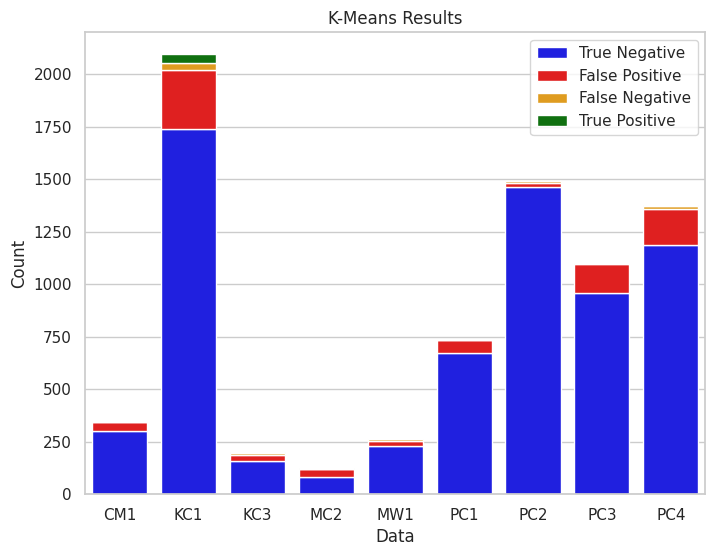

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
def kmeans(df):
    # Remove the 'id' and 'Defective' columns from the DataFrame
    X = df.drop(['Defective'], axis=1)

    # Fit the K-Means model with k=2
    kmeans = KMeans(n_clusters=2).fit(X)

    # Predict the cluster labels
    labels = kmeans.predict(X)

    # Convert 'N' and 'Y' labels to integers
    label_map = {'N': 0, 'Y': 1}
    y_true = df['Defective'].map(label_map)

    # Create a confusion matrix
    cm = confusion_matrix(y_true, labels)
    # # Extract the True Negative, False Positive, False Negative, and True Positive values
    tn, fn, fp, tp = cm.ravel()
    error = (fp + fn) / (tp + tn + fn + fp)
    rand_index = (tp + tn) / (tp + tn + fn + fp)
    return tn, fn, fp, tp,error ,rand_index

print("----------------------------------------------- Simple K-Means Table -----------------------------------------------")
# return value and make Table
tn_list=[]
fn_list=[]
fp_list=[]
tp_list=[]
Table=PrettyTable(["Data","True Negative", "False Positive", "False Negative", "True Positive","Error","rand index"])
tn, fn, fp, tp,error ,rand_index=kmeans(df1)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["CM1",tn, fn, fp, tp,error ,rand_index])
tn, fn, fp, tp,error ,rand_index=kmeans(df2)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["KC1",tn, fn, fp, tp,error ,rand_index])
tn, fn, fp, tp,error ,rand_index=kmeans(df3)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["KC3",tn, fn, fp, tp,error ,rand_index])
tn, fn, fp, tp,error ,rand_index=kmeans(df4)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["MC2",tn, fn, fp, tp,error ,rand_index])
tn, fn, fp, tp,error ,rand_index=kmeans(df5)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["MW1",tn, fn, fp, tp,error ,rand_index])
tn, fn, fp, tp,error ,rand_index=kmeans(df6)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC1",tn, fn, fp, tp,error ,rand_index])
tn, fn, fp, tp,error ,rand_index=kmeans(df7)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC2",tn, fn, fp, tp,error ,rand_index])
tn, fn, fp, tp,error ,rand_index=kmeans(df8)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC3",tn, fn, fp, tp,error ,rand_index])
tn, fn, fp, tp,error ,rand_index=kmeans(df9)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC4",tn, fn, fp, tp,error ,rand_index])
print(Table)

data = {'Data': ['CM1', 'KC1', 'KC3', 'MC2', 'MW1', 'PC1', 'PC2', 'PC3', 'PC4']}
data.update({'True Negative':tn_list})
data.update({'False Negative':fn_list})
data.update({'False Positive':fp_list})
data.update({'True Positive':tp_list})
df = pd.DataFrame(data)

# Plot the table using seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=df, x='Data', y='True Negative', color='blue', label='True Negative')
ax = sns.barplot(data=df, x='Data', y='False Positive', color='red', bottom=df['True Negative'], label='False Positive')
ax = sns.barplot(data=df, x='Data', y='False Negative', color='orange', bottom=df['True Negative']+df['False Positive'], label='False Negative')
ax = sns.barplot(data=df, x='Data', y='True Positive', color='green', bottom=df['True Negative']+df['False Positive']+df['False Negative'], label='True Positive')

plt.xlabel('Data')
plt.ylabel('Count')
plt.title('K-Means Results')
plt.legend()
plt.show()

Step 3.5: Implement Point center algorithm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

def point_center(df):
    # Drop any rows with missing values
    df.dropna(inplace=True)

    # Extract the values of the features
    X = df.iloc[:, 1:-1].values

    # Calculate the point center
    point_center = np.mean(X, axis=0)

    # Calculate the distances from each point to the point center
    distances = np.sqrt(np.sum(np.square(X - point_center), axis=1))

    # Sort the distances in descending order and find the elbow point
    sorted_distances = np.sort(distances)[::-1]
    deltas = sorted_distances[:-1] - sorted_distances[1:]
    elbow_index = np.argmax(deltas) + 1

    # Determine the value of K
    k = elbow_index + 1

    # Initialize the centroids using the KMeans++ algorithm
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    return k,centroids


Table=PrettyTable(["Data", "K value"])
k,centroids=point_center(df1)
Table.add_row(["CM1",k])
k,centroids=point_center(df2)
Table.add_row(["KC1",k])
k,centroids=point_center(df3)
Table.add_row(["KC3",k])
k,centroids=point_center(df4)
Table.add_row(["MC2",k])
k,centroids=point_center(df5)
Table.add_row(["MW1",k])
k,centroids=point_center(df6)
Table.add_row(["PC1",k])
k,centroids=point_center(df7)
Table.add_row(["PC2",k])
k,centroids=point_center(df8)
Table.add_row(["PC3",k])
k,centroids=point_center(df9)
Table.add_row(["PC4",k])
print(Table)

+------+---------+
| Data | K value |
+------+---------+
| CM1  |    3    |
| KC1  |    2    |
| KC3  |    2    |
| MC2  |    4    |
| MW1  |    2    |
| PC1  |    2    |
| PC2  |    2    |
| PC3  |    2    |
| PC4  |    2    |
+------+---------+


Step 3: Implement Proposed K-means

----------------------------------------------- Proposed K-Means Table -----------------------------------------------
+------+------------------------+-------------------------+-------------------------+------------------------+----------------------+--------------------+
| Data | True Negative Proposed | False Positive Proposed | False Negative Proposed | True Positive Proposed |        Error         |     Rand index     |
+------+------------------------+-------------------------+-------------------------+------------------------+----------------------+--------------------+
| CM1  |          300           |            2            |            42           |           0            | 0.12790697674418605  | 0.872093023255814  |
| KC1  |          1739          |            31           |           283           |           42           | 0.14988066825775656  | 0.8501193317422434 |
| KC3  |          163           |            1            |            35           |           1         

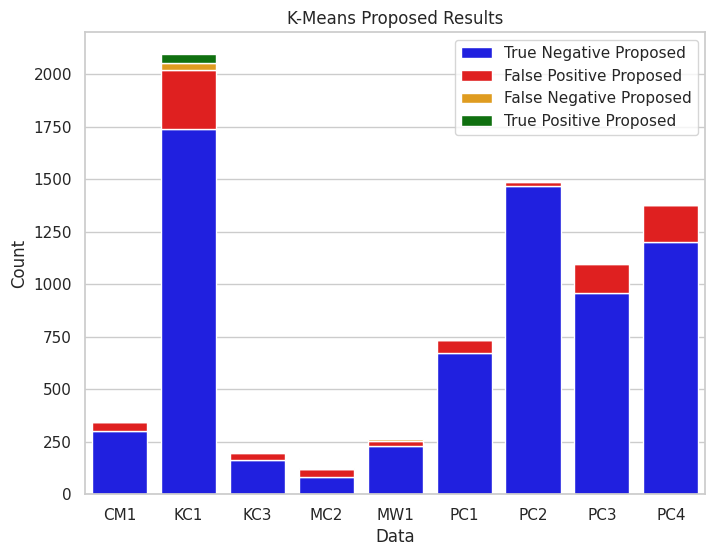

In [ ]:
import pandas as pd

def proposed_kmean(df):
    # Identify string columns
    string_cols = df.select_dtypes(include='object').columns

    # Replace string values with numeric
    df[string_cols] = df[string_cols].replace(['N', 'Y'], [0,1])

    # Replace missing values with mean
    df = df.fillna(df.mean())

    # Calculate point center
    means = df.mean()

    k = len(df['Defective'].unique())
    centroids = [means] * k

    # Perform k-means clustering
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, init=centroids, n_init=1)
    clusters = kmeans.fit_predict(df)

    # Calculate error and Rand index
    confusion_matrix = pd.crosstab(df['Defective'], clusters)

    error = (confusion_matrix.iloc[0,1] + confusion_matrix.iloc[1,0]) / confusion_matrix.sum().sum()
    rand_index = (confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1]) / confusion_matrix.sum().sum()

    return confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1],error,rand_index

print("----------------------------------------------- Proposed K-Means Table -----------------------------------------------")
tn_list=[]
fn_list=[]
fp_list=[]
tp_list=[]

Table=PrettyTable(["Data","True Negative Proposed", "False Positive Proposed", "False Negative Proposed", "True Positive Proposed","Error","Rand index"])
tn,fp,fn,tp,error,rand_index = proposed_kmean(df1)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["CM1",tn, fn, fp, tp, error, rand_index])
tn,fp,fn,tp,error,rand_index = proposed_kmean(df2)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["KC1",tn, fn, fp, tp,error,rand_index])
tn,fp,fn,tp,error,rand_index = proposed_kmean(df3)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["KC3",tn, fn, fp, tp,error,rand_index])
tn,fp,fn,tp,error,rand_index = proposed_kmean(df4)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["MC2",tn, fn, fp, tp,error,rand_index])
tn,fp,fn,tp,error,rand_index = proposed_kmean(df5)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["MW1",tn, fn, fp, tp,error,rand_index])
tn,fp,fn,tp,error,rand_index = proposed_kmean(df6)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC1",tn, fn, fp, tp,error,rand_index])
tn,fp,fn,tp,error,rand_index = proposed_kmean(df7)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC2",tn, fn, fp, tp,error,rand_index])
tn,fp,fn,tp,error,rand_index = proposed_kmean(df8)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC3",tn, fn, fp, tp,error,rand_index])
tn,fp,fn,tp,error,rand_index = proposed_kmean(df9)
tn_list.append(tn)
fn_list.append(fn)
fp_list.append(fp)
tp_list.append(tp)
Table.add_row(["PC4",tn, fn, fp, tp,error,rand_index])
print(Table)

data = {'Data': ['CM1', 'KC1', 'KC3', 'MC2', 'MW1', 'PC1', 'PC2', 'PC3', 'PC4']}
data.update({'True Negative Proposed':tn_list})
data.update({'False Negative Proposed':fn_list})
data.update({'False Positive Proposed':fp_list})
data.update({'True Positive Proposed':tp_list})
df = pd.DataFrame(data)

# Plot the table using seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=df, x='Data', y='True Negative Proposed', color='blue', label='True Negative Proposed')
ax = sns.barplot(data=df, x='Data', y='False Positive Proposed', color='red', bottom=df['True Negative Proposed'], label='False Positive Proposed')
ax = sns.barplot(data=df, x='Data', y='False Negative Proposed', color='orange', bottom=df['True Negative Proposed']+df['False Positive Proposed'], label='False Negative Proposed')
ax = sns.barplot(data=df, x='Data', y='True Positive Proposed', color='green', bottom=df['True Negative Proposed']+df['False Positive Proposed']+df['False Negative Proposed'], label='True Positive Proposed')

plt.xlabel('Data')
plt.ylabel('Count')
plt.title('K-Means Proposed Results')
plt.legend()
plt.show()